# Intermediate thickness: Peak fitting

When the spectrum contains only few peaks, FFT method becomes less reliable. To determine the film thickness $h$, we consider two scenarii : either the peak fitting is successful, or small fitting errors are present. Theoritical backgrounds of the two method are explain in an upcoming publication.

## Scenario 1: Successful peak fitting

Assuming the previous procedure has been followed and the resulting peak plot is as follows :

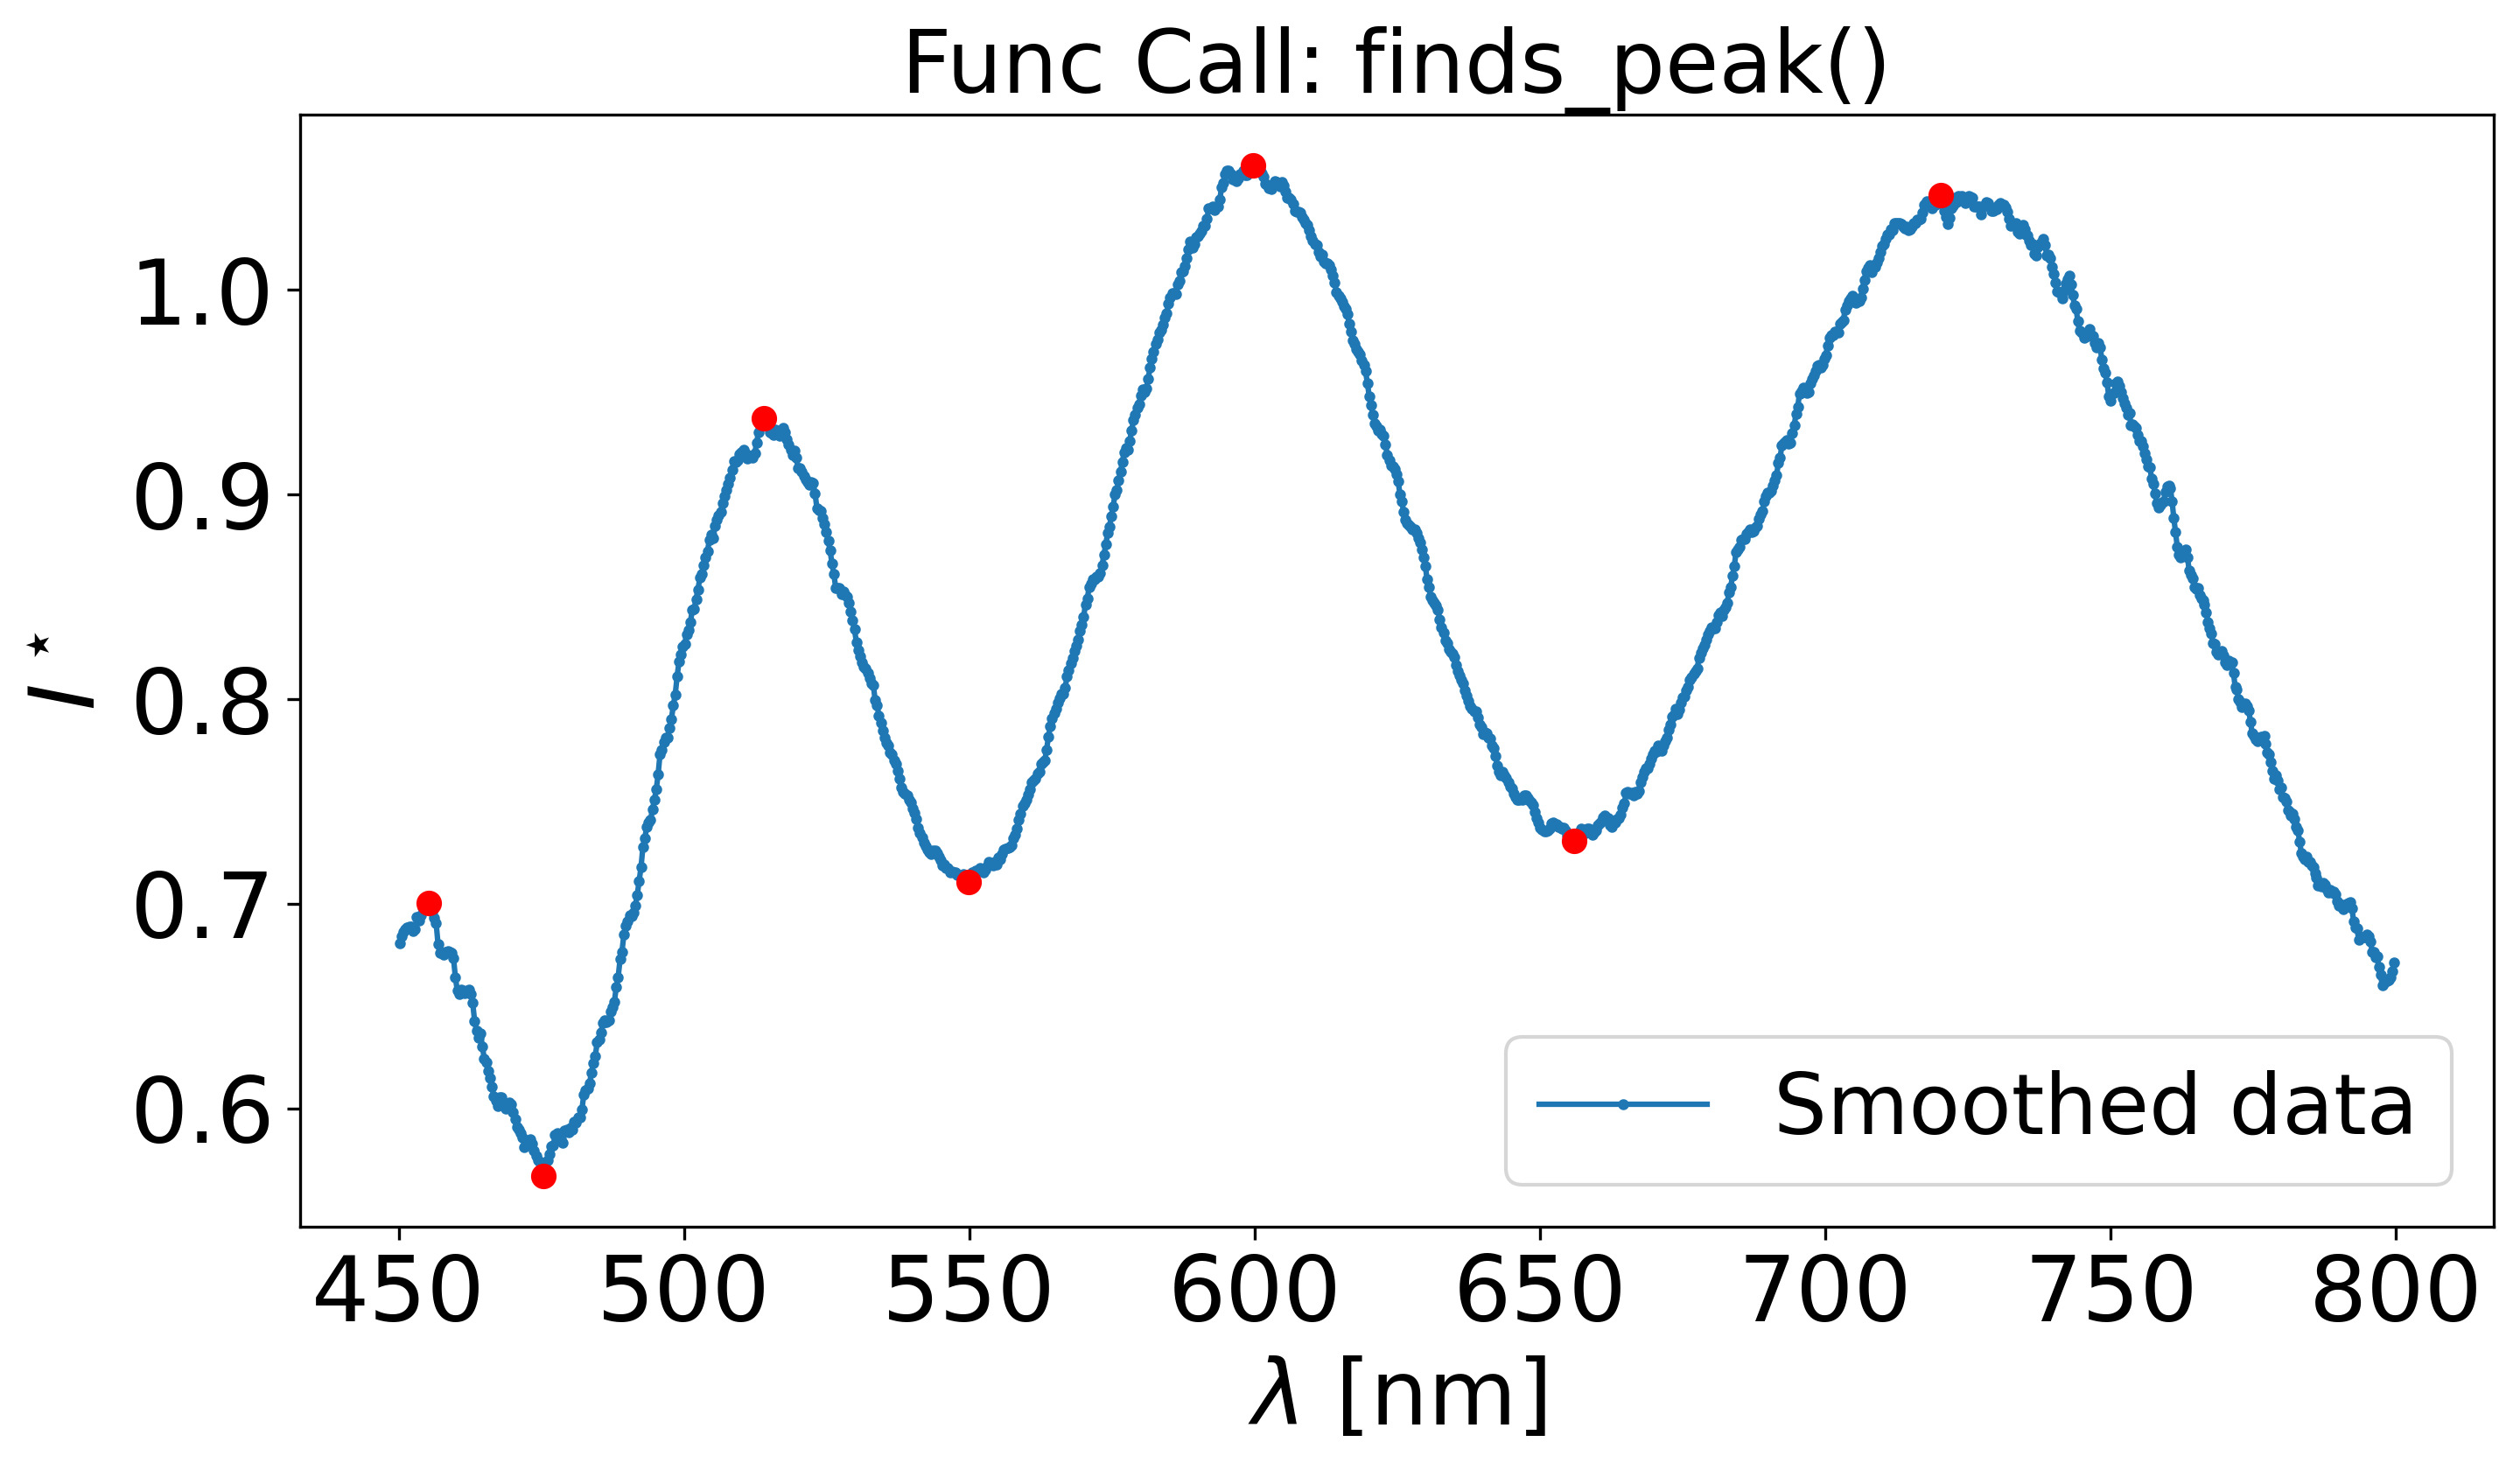

(array([ 75, 300, 632]), array([ 15, 191, 454, 840]))

In [1]:
from pathlib import Path
from optifik.io import load_spectrum
from optifik.analysis import plot_spectrum
from optifik.analysis import smooth_intensities
from optifik.analysis import finds_peak

# Define the path to the folder containing your .xy file
datafile_path = Path('../../data/basic/000004310.xy')
# Load wavelengths and intensities from the file
wavelengths, intensities = load_spectrum(datafile_path, 
                                         wavelength_min=450, 
                                         wavelength_max=800)

# Smoothing the intensity
intensities_smoothed = smooth_intensities(intensities)

# Peak detection function, min_peak_prominence and min_peak_distance can be adjusted.
finds_peak(wavelengths, intensities_smoothed, 
           min_peak_prominence=0.018, 
           min_peak_distance=10, 
           plot=True)

To derive the film thickness $h$, we use the linear regression method `method='linreg'` of the `thickness_from_minmax` function from the `optifik.minmax` module. Here an exemple of plot you can obtain.

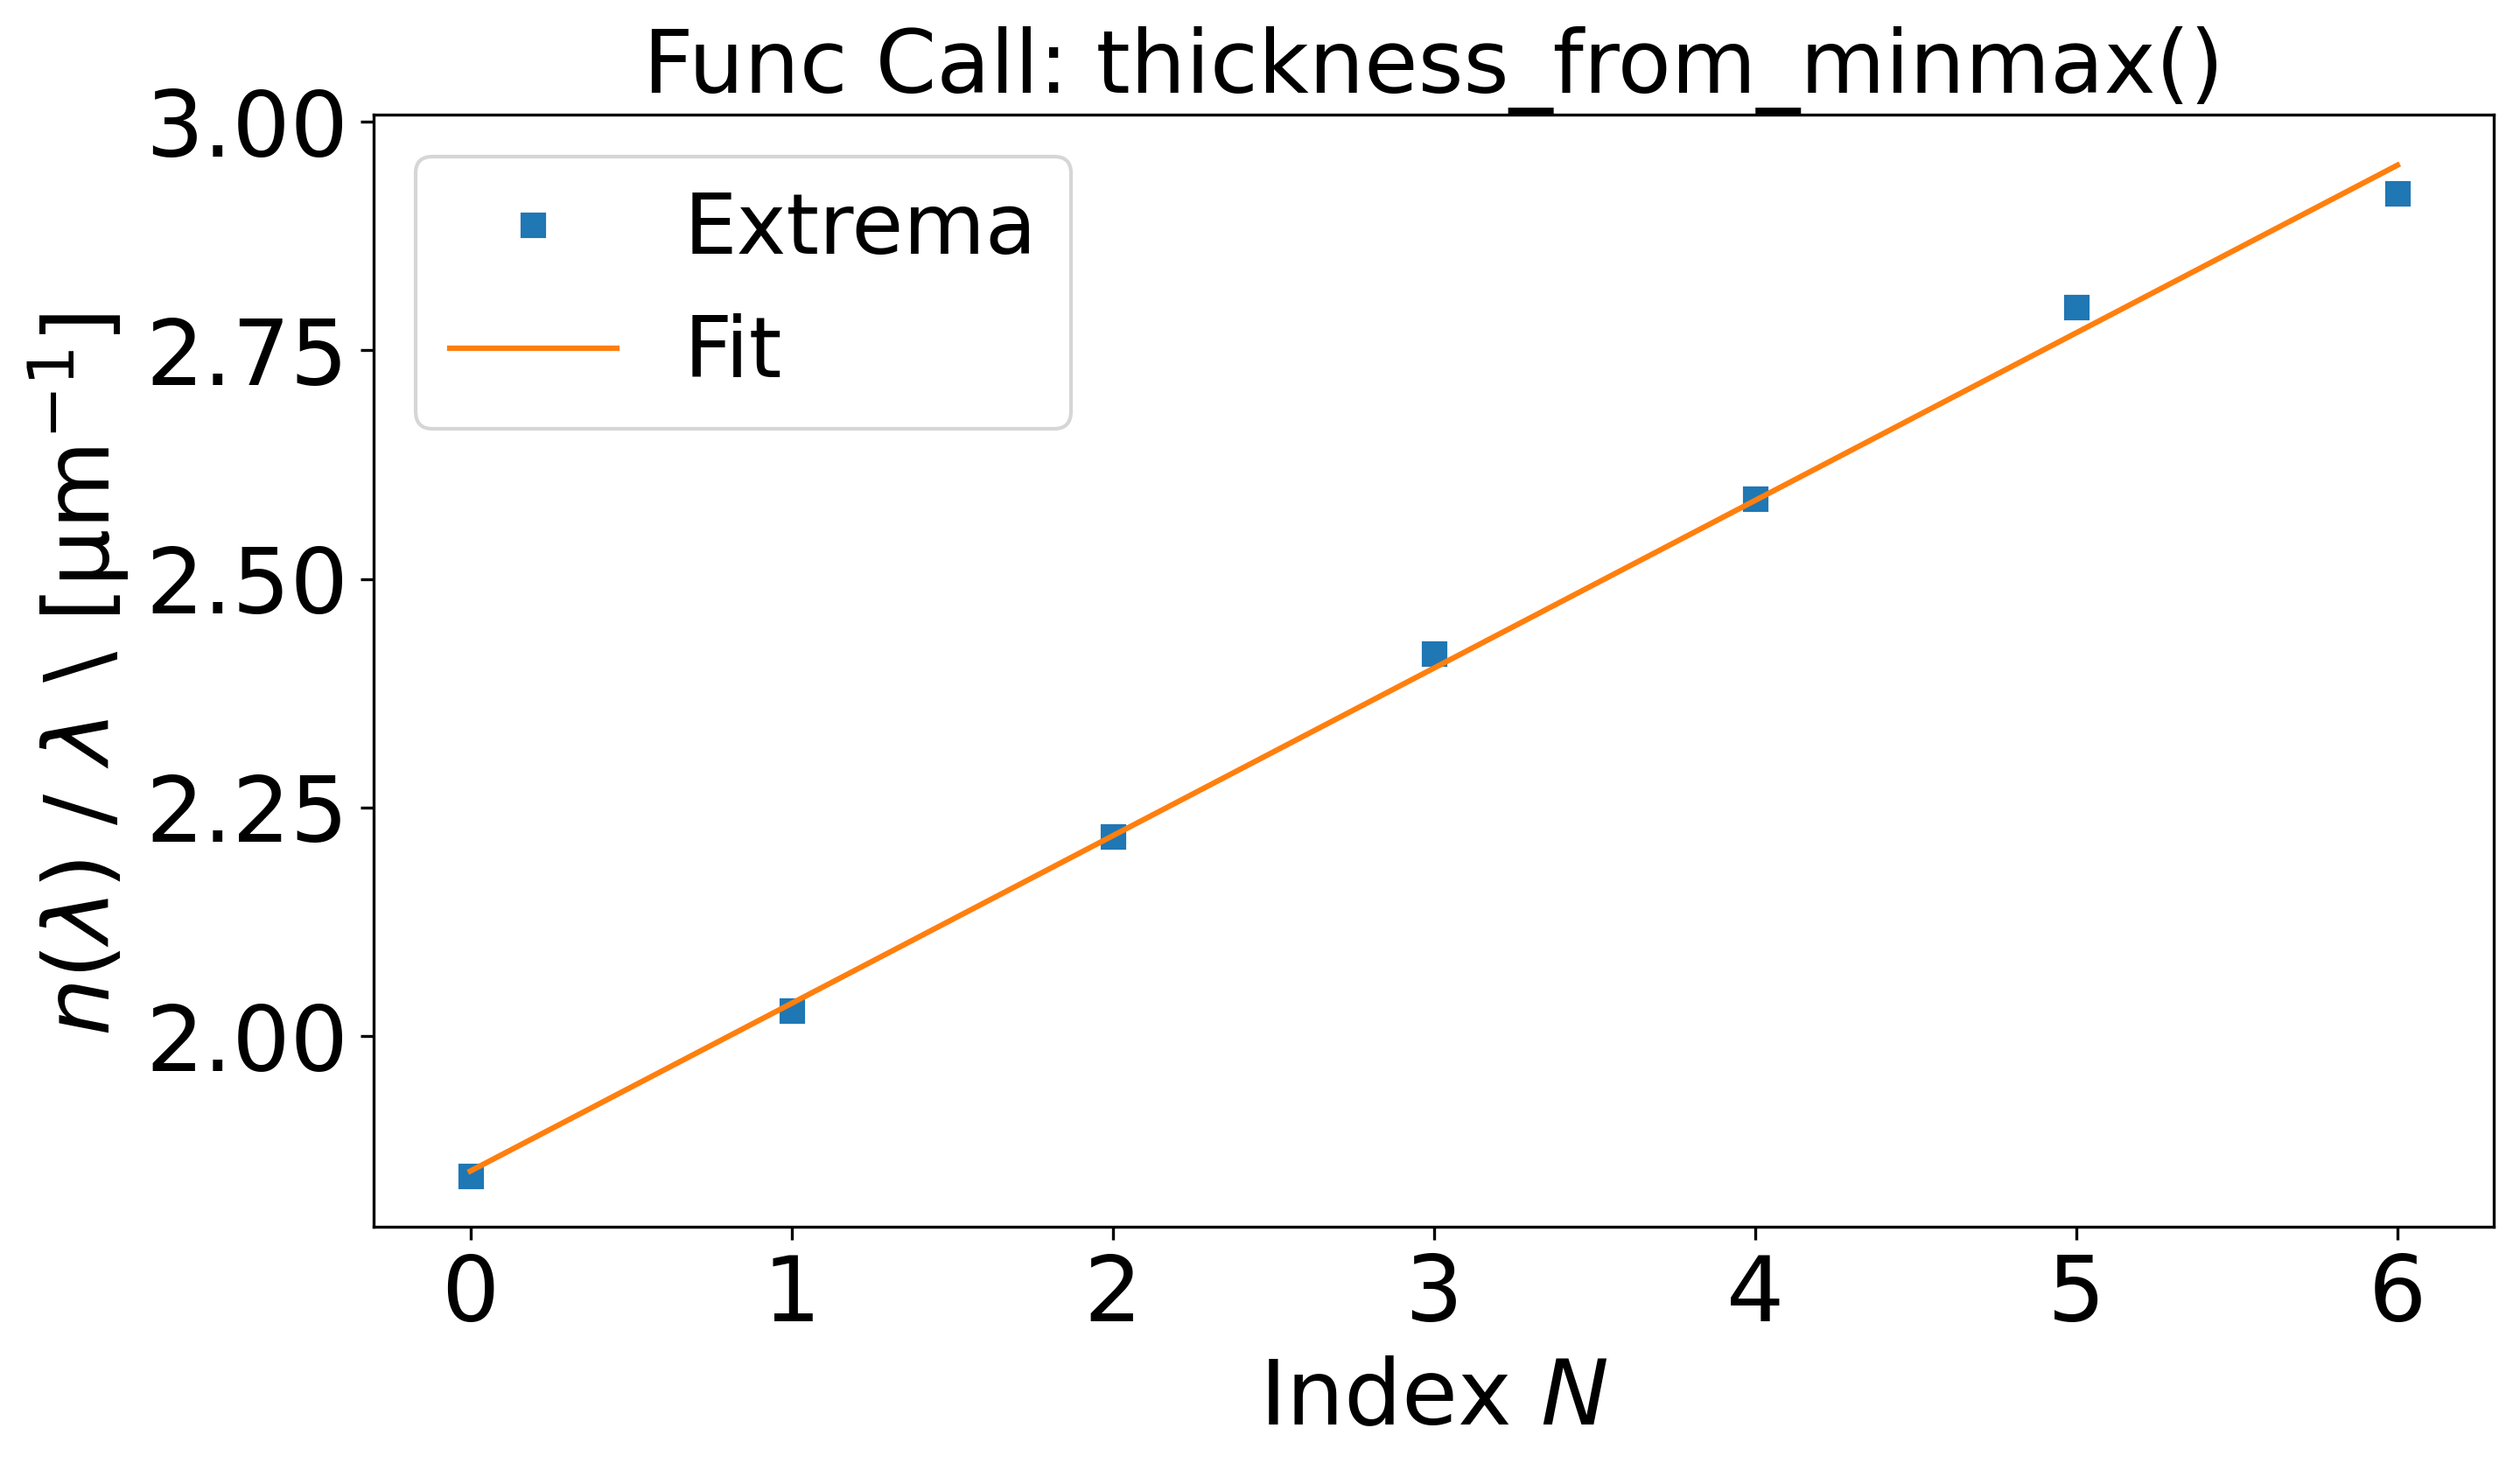

 peaks_max: array([ 15, 191, 454, 840])
 peaks_min: array([ 75, 300, 632])
    stderr: np.float64(3.90305266316079e-06)
 thickness: np.float64(1363.2494169087543)

In [2]:
from optifik.minmax import thickness_from_minmax

# Determine the film thickness by least squares linear regression
thickness_from_minmax(wavelengths, intensities_smoothed, 
                      refractive_index=1.33, 
                      min_peak_prominence=0.018,
                      min_peak_distance=10, 
                      method='linreg', 
                      plot=True)


The least-squares regression method in the `thickness_from_minmax` function automatically determines the film thickness $h$.

The console output shows the wavelength peak indices for minima and maxima, along with the standard deviation of the film thickness $h$, which is 1363.25 nm in this example

- The example correponds to the file `000004310.xy`, located in the `..\tests\basic` folder
- You can specify the medium's refractive index, the peak prominence and the minimum peak distance using the `refractive_index`, `min_peak_prominence` and the  `min_peak_distance` parameters, respectively.
- You can also provide a refractive index array $n(\lambda)$ as an `refractive_index` input.

## Scenario 2: Small errors detection

Assuming the previous procedure has been followed and the resulting peak plot is as follows :

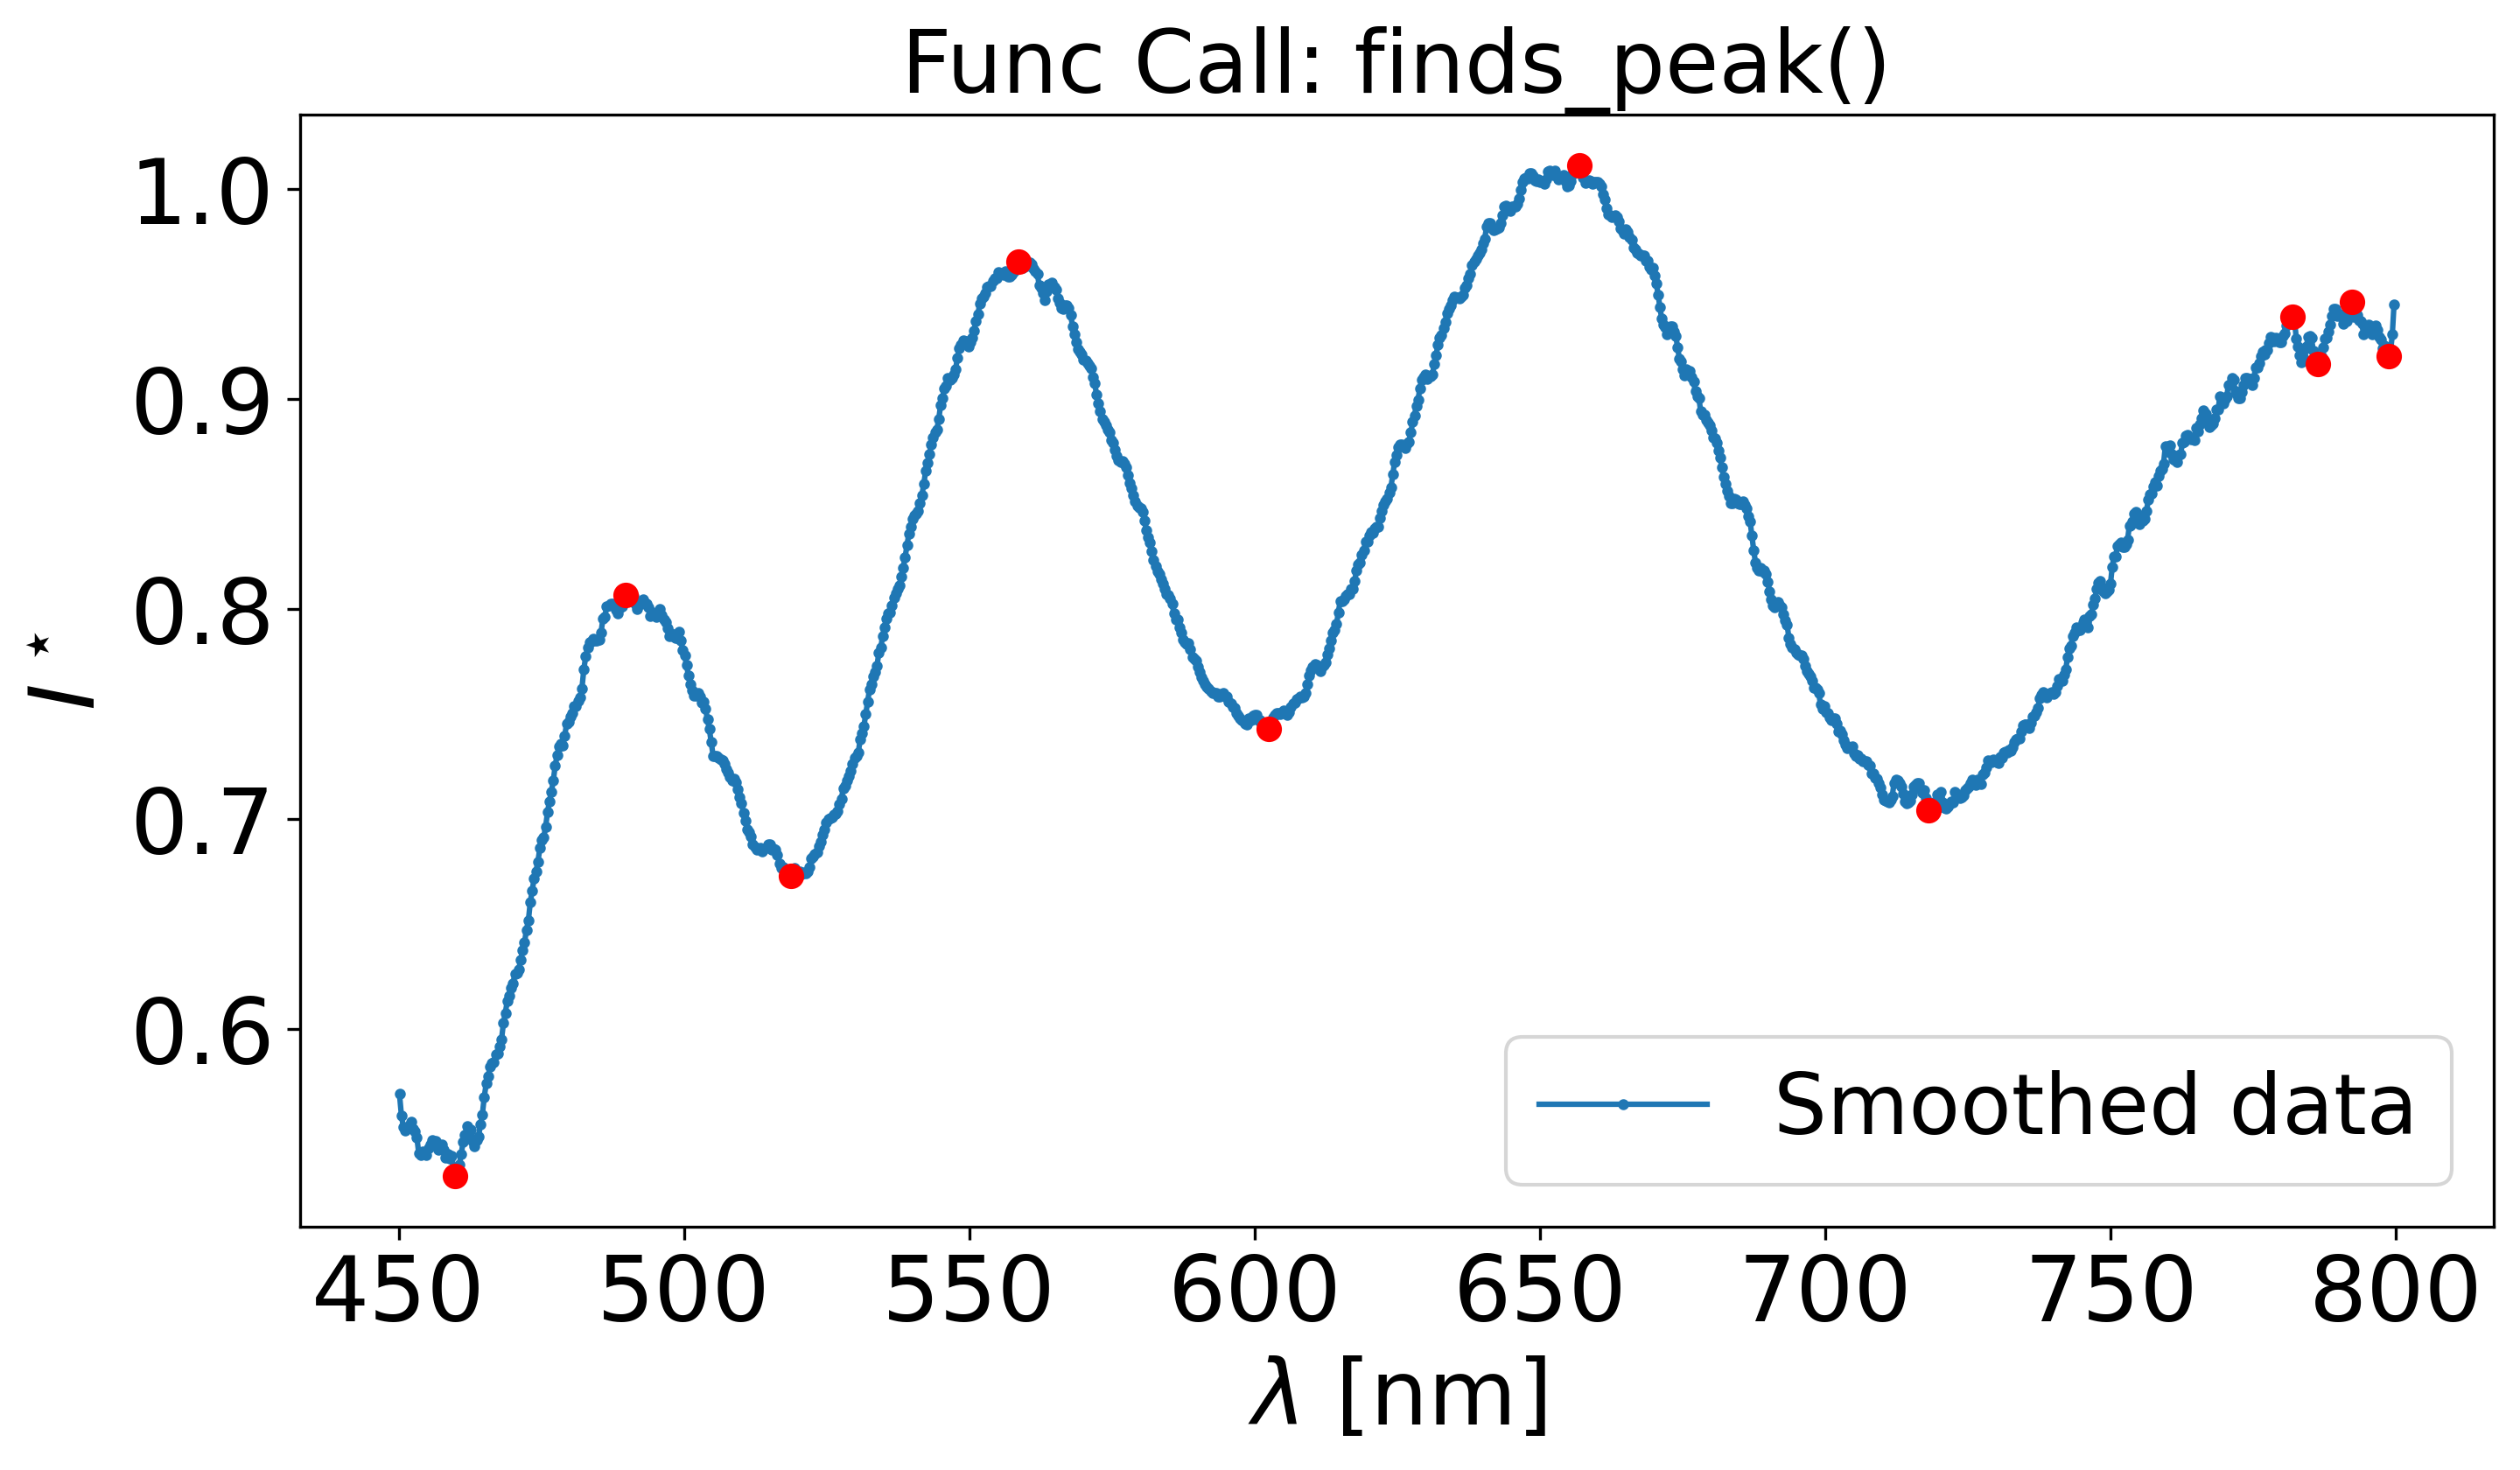

(array([  29,  205,  463,  833, 1060, 1102]),
 array([ 118,  327,  635, 1045, 1080]))

In [3]:
from pathlib import Path
from optifik.io import load_spectrum
from optifik.analysis import plot_spectrum
from optifik.analysis import smooth_intensities
from optifik.analysis import finds_peak

# Define the path to the folder containing your .xy file
datafile_path = Path('../../data/basic/Fail_000004168.xy')

# Load wavelengths and intensities from the file
wavelengths, intensities = load_spectrum(datafile_path, 
                                         wavelength_min=450, 
                                         wavelength_max=800)

# Smoothing the intensity
intensities_smoothed = smooth_intensities(intensities)

# Peak detection function, min_peak_prominence and min_peak_distance can be adjusted.
finds_peak(wavelengths, intensities_smoothed, 
           min_peak_prominence=0.018, 
           min_peak_distance=10, 
           plot=True)

On the above figure, errors are visible on the rightmost data points. To derive the film thickness $h$, we use the RANSAC method `method='ransac'` of the `thickness_from_minmax` function from the `optifik.minmax` module. Here an exemple of plot you can obtain.

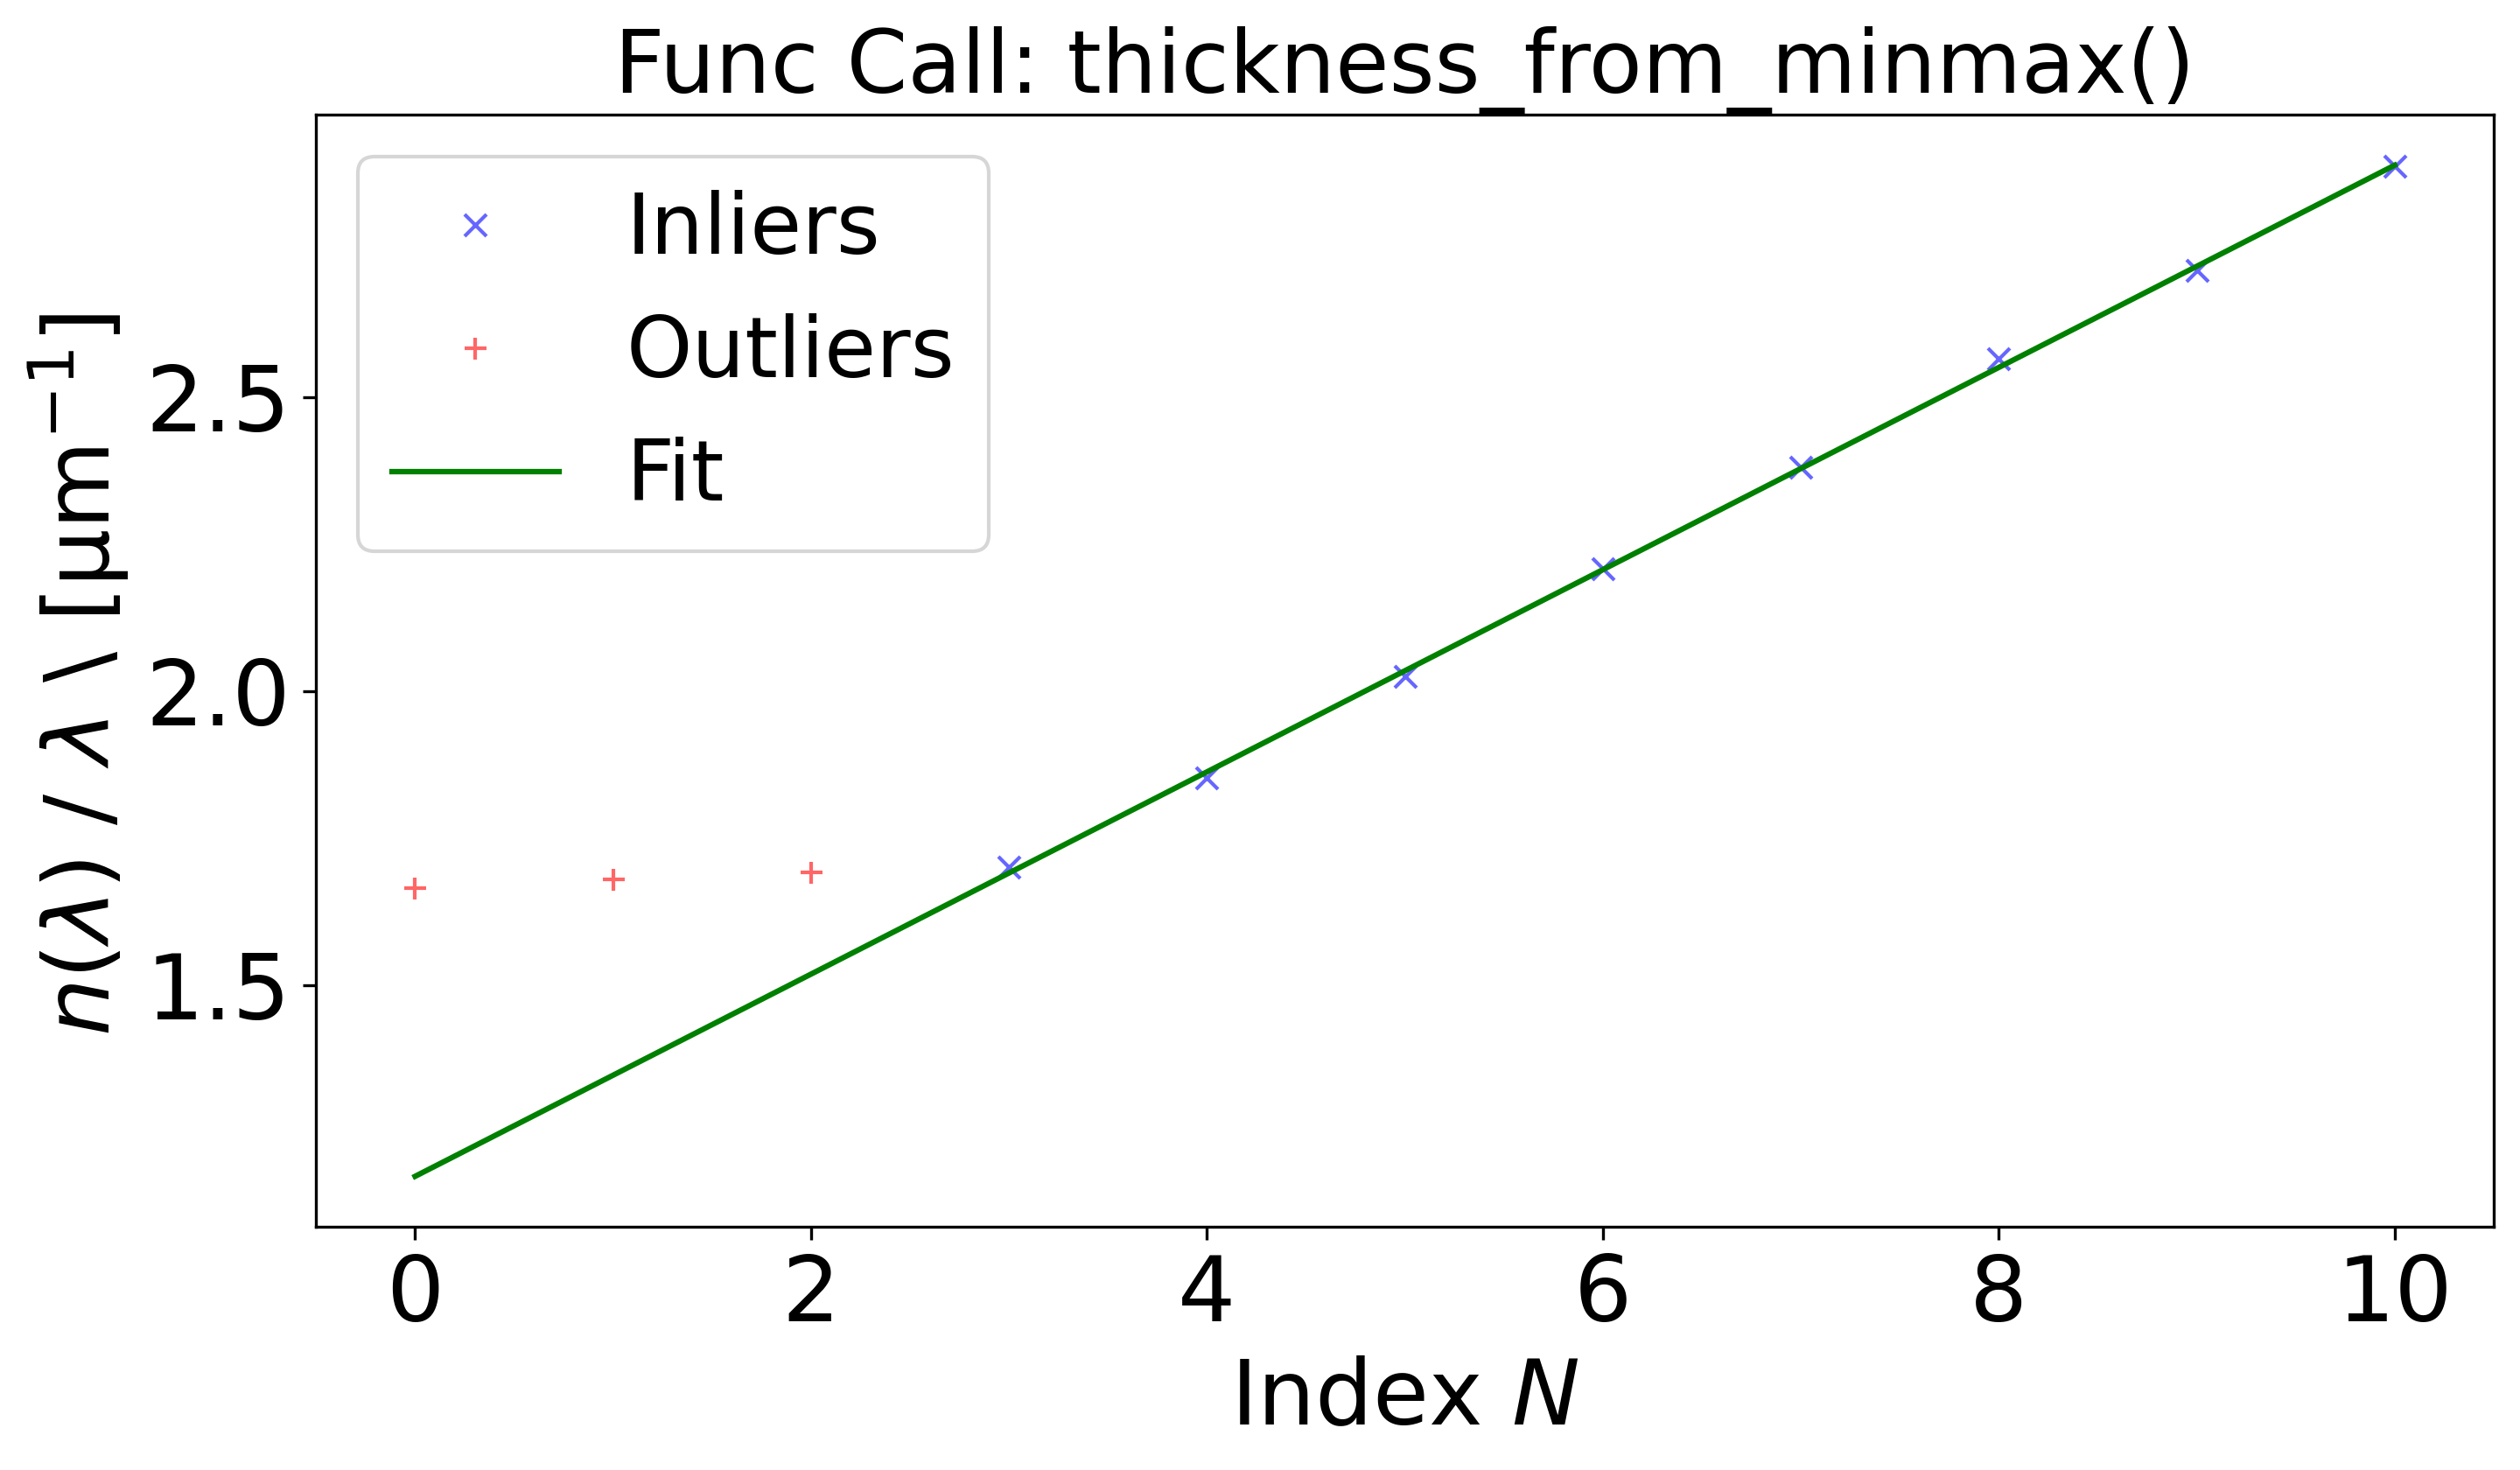

  num_inliers: np.int64(8)
 num_outliers: np.int64(3)
    peaks_max: array([ 118,  327,  635, 1045, 1080])
    peaks_min: array([  29,  205,  463,  833, 1060, 1102])
    thickness: np.float64(1453.9390579484852)

In [4]:
from optifik.minmax import thickness_from_minmax

# Determine the film thickness by RANSAC procedure
thickness_from_minmax(wavelengths,intensities_smoothed,
                      refractive_index=1.33,
                      min_peak_prominence=0.018, 
                      min_peak_distance=10,
                      method='ransac', 
                      plot=True)

The RANSAC-based method in the `thickness_from_minmax` function automatically determines the film thickness $h$.


The console output shows the number of successfully detected peaks, the number of failed detections, the wavelength peak indices for both minima and maxima, and the film thickness $h$, which is 1453.94 nm in this example.

- You can specify the medium's refractive index, the peak prominence and the minimum peak distance using the `refractive_index`, `min_peak_prominence` and the  `min_peak_distance` parameters, respectively.
- You can also provide a refractive index function $n(\lambda)$ as an `refractive_index` input.

In the following, we will see the case where the spectrum contains less than 5 peaks.